<a href="https://colab.research.google.com/github/Artyom995/Artyom995/blob/main/10_%D1%83%D1%80%D0%BE%D0%BA_%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача 1. Обнаружение фальшивых новостей
Фальшивые новости — это ложная информация, распространяемая через социальные сети и другие сетевые СМИ для достижения политических или идеологических целей.

Твоя  задача -  используя библиотеку sklearn построить модель классического машинного обучения, которая может с высокой точностью более 90% определять, является ли новость реальной (REAL） или фальшивой（FAKE).

Ты должен самостоятельно изучить и применить к задаче TfidfVectorizer для извлечения признаков из текстовых данных и PassiveAggressiveClassifier.

Ты  можешь использовать данный датасет для обучения.

Построй матрицу ошибок (confusion matrix). Представь, что ваш заказчик очень любит графики и диаграммы. Визуализируй для него результаты там, где это возможно.

Что такое TfidfVectorizer?
Изучение текстовых данных является одной из фундаментальных задач в области анализа данных и машинного обучения.

Однако тексты представляют собой сложные и многомерные структуры, которые не могут быть напрямую обработаны алгоритмами машинного обучения. В этом контексте извлечение признаков — это процесс преобразования текстовых данных в числовые векторы, которые могут быть использованы для обучения моделей и анализа. Этот шаг играет ключевую роль в предварительной обработке данных перед применением алгоритмов.

Term Frequency-Inverse Document Frequency (TF-IDF) — это один из наиболее распространенных и мощных методов для извлечения признаков из текстовых данных. TF-IDF вычисляет важность каждого слова в документе относительно количества его употреблений в данном документе и во всей коллекции текстов. Этот метод позволяет выделить ключевые слова и понять, какие слова имеют больший вес для определенного документа в контексте всей коллекции.

TfidfVectorizer преобразует коллекцию необработанных документов в матрицу объектов TF-IDF.

Что такое пассивно-агрессивный классификатор (PassiveAggressiveClassifier)?
Пассивно-агрессивный классификатор – это алгоритм онлайн-обучения, в котором вы обучаете систему постепенно, загружая ее экземпляры последовательно, отдельно или небольшими группами, называемыми мини-партиями.

При онлайн-обучении модель машинного обучения обучается и развертывается в производственной среде таким образом, чтобы обучение продолжалось по мере поступления новых наборов данных. Таким образом, мы можем сказать, что такой алгоритм, как пассивно-агрессивный классификатор, лучше всего подходит для систем, которые получают данные в непрерывном потоке. Он пассивно реагирует на правильные классификации и агрессивно реагирует на любые просчеты.

Задача 1 (TF-IDF, PassiveAggressiveClassifier)

https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html
https://www.geeksforgeeks.org/passive-aggressive-classifiers/
https://www.kaggle.com/code/meetnagadia/fakenewsdetection-passiveaggressiveclassifier

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import cross_val_score


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv('/content/fake_news.csv')


In [ ]:
# Посмотрим на первые строки датасета
print(df.head())
# Проверим на наличие пропусков
print('-------наличие пропусков---------')
print(df.isnull().sum())

print('-------классы сбалансированы или нет---------')
# Убедимся, что классы сбалансированы
print(df['label'].value_counts())

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  
-------наличие пропусков---------
Unnamed: 0    0
title         0
text          0
label         0
dtype: int64
-------классы сбалансированы или нет---------
label
REAL    3171
FAKE    3164
Name: count, dtype: int64


Точность: 93.84%
1357    FAKE
2080    FAKE
2718    FAKE
812     FAKE
4886    FAKE
        ... 
1512    FAKE
57      REAL
6092    REAL
3403    REAL
292     REAL
Name: label, Length: 1267, dtype: object
Матрица:
[[587  41]
 [ 37 602]]


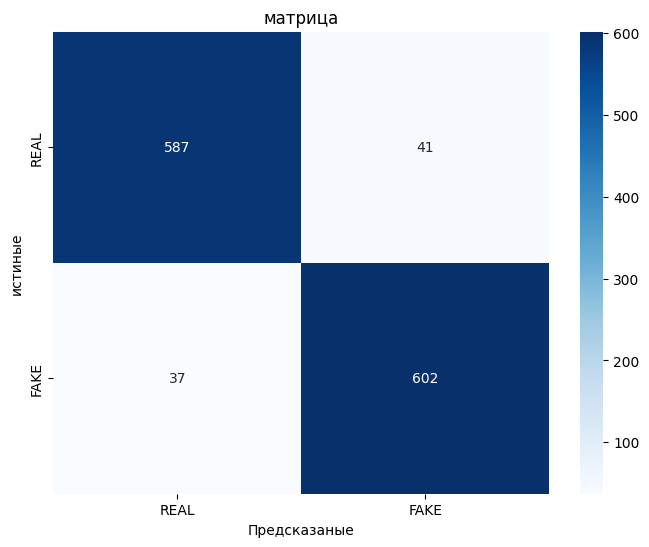

In [ ]:
# Предобработка текста
X = df['text']  # столбец с текстом называется 'text'
y = df['label']  # Столбец с метками

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #test_size=0.2 - 20% данных будет отведено для тестирования, 80% — для обучения

# Преобразование текста в числовые признаки
tfidf_vectorizer = TfidfVectorizer() #преобразуем текстовые данные в числовые векторы с использованием метода TF-IDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)#создает матрицу признаков.
X_test_tfidf = tfidf_vectorizer.transform(X_test) #преобразовываем тестовые данные в ту же числовую форму, что и обучающие данные.

# Обучение модели
classifier = PassiveAggressiveClassifier(max_iter=1000, random_state=42)#max_iter - максимальное количество итераций random_state=42 позволяет контролировать генерацию случайных чисел,
classifier.fit(X_train_tfidf, y_train) #обучаем модель на преобразованных обучающих данных с помощью метода fit

# Прогнозирование
y_pred = classifier.predict(X_test_tfidf)#используем обученную модель для предсказания меток

# Оценка модели
accuracy = accuracy_score(y_test, y_pred) #сравниваем предсказанные метки
print(f'Точность: {accuracy * 100:.2f}%')
print(y_test)
# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print('Матрица:')
print(conf_matrix)


# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['REAL', 'FAKE'], yticklabels=['REAL', 'FAKE'])
plt.ylabel('истиные')
plt.xlabel('Предсказаные')
plt.title('матрица')
plt.show()



ROC-кривая и площадь под кривой (AUC) предоставляют важную информацию о том, насколько хорошо ваша модель распознает классы.

Высокая AUC (ближе к 1): Это указывает на то, что модель хорошо различает положительные и отрицательные классы. Чем выше AUC, тем лучше модель.
AUC около 0.5: Это говорит о том, что модель не лучше случайного угадывания. Она не может эффективно различать классы.
AUC ниже 0.5: Это означает, что модель работает хуже, чем случайное угадывание, и, вероятно, требует пересмотра или улучшения.

[0 0 1 ... 0 1 1]
[0 0 0 ... 1 1 1]


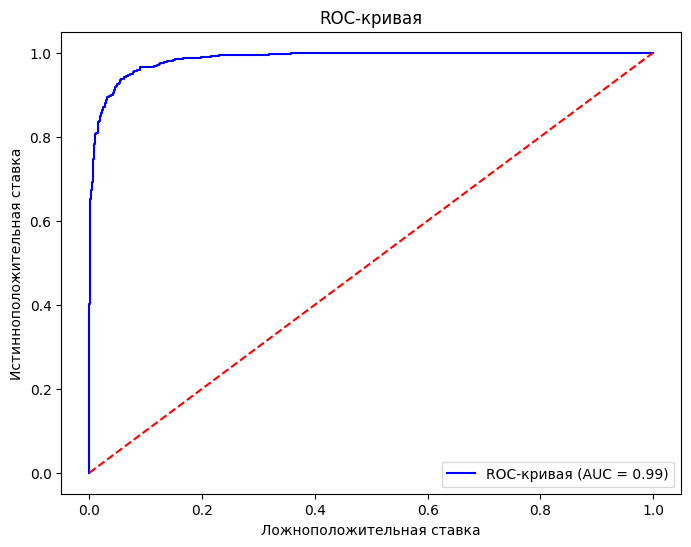

In [ ]:
#Преобразование FAKE и REAL в числа (0,1)
le = LabelEncoder()
y = le.fit_transform(df['label'])
print(y)
y_test = le.transform(y_test)
print(y_test)
# Получение оценок для ROC-кривой
y_scores = classifier.decision_function(X_test_tfidf)

# Вычисление ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Визуализация ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Ложноположительная ставка')
plt.ylabel('Истинноположительная ставка')
plt.title('ROC-кривая')
plt.legend()
plt.show()

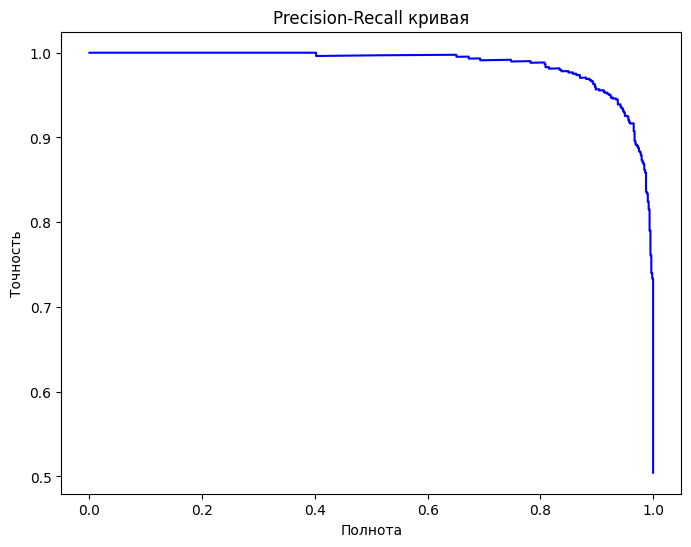

In [ ]:

precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Визуализация Precision-Recall кривой
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue')
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.title('Precision-Recall кривая')
plt.show()

Задача 2. Обнаружение болезни паркинсона с помощью XGBoost
Твоя задача с помощью Data Science предсказать заболевание паркинсона на ранней стадии, используя алгоритм машинного обучения XGBoost и библиотеку sklearn для нормализации признаков. Как это сделать? Тебя  придется самостоятельно изучить данный вопрос.

Используй следующий датасет UCI ML Parkinsons. Описание признаков и меток датасета представлены здесь. От тебя  требуется помимо создания самой модели получить ее точность на тестовой выборке. Выборки делить в соотношении 80% обучающая, 20% - тестовая.

Дополнительные баллы ты получишь, если сможешь получить точность более 95%.

Что такое болезнь Паркинсона?
Болезнь Паркинсона - прогрессирующее заболевание центральной нервной системы, влияющее на движение и вызывающее тремор и скованность движений.

У нее 5 стадий, и ежегодно ею страдают более 1 миллиона человек только в одной Индии. Это хроническое заболевание, и его пока не лечат. Это нейродегенеративное расстройство, поражающее нейроны головного мозга, вырабатывающие дофамин.

Что такое XGBoost?
XGBoost - это новый алгоритм машинного обучения, разработанный с учетом скорости и производительности.

XGBoost расшифровывается как экстремальное повышение градиента и основан на деревьях решений.

Многие считают его одним из лучших алгоритмов и из-за его высокой производительности при решении задач регрессии и классификации, рекомендуют его в качестве первого выбора во многих ситуациях. XGBoost прославился тем, что выиграл множество соревнований Kaggle

Есть 2 распространенных способа использования XGBoost:

Learning API: это базовый низкоуровневый способ использования XGBoost. Простой и мощный, он включает встроенный метод перекрестной проверки.
Scikit-Learn API: это интерфейс-оболочка Scikit-Learn для XGBoost. Он позволяет использовать XGBoost совместимым с scikit-learn способом, точно так же, как вы использовали бы любую нативную модель scikit-learn.
В этом задании мы рекомендуем использовать XGBClassifier из библиотеки xgboost, который является реализацией scikit-learn API для классификации XGBoost.

In [ ]:
!pip install pandas numpy scikit-learn xgboost

In [ ]:
data = pd.read_csv('/content/parkinsons.data')
print(data.head(5))
print(data.shape)

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

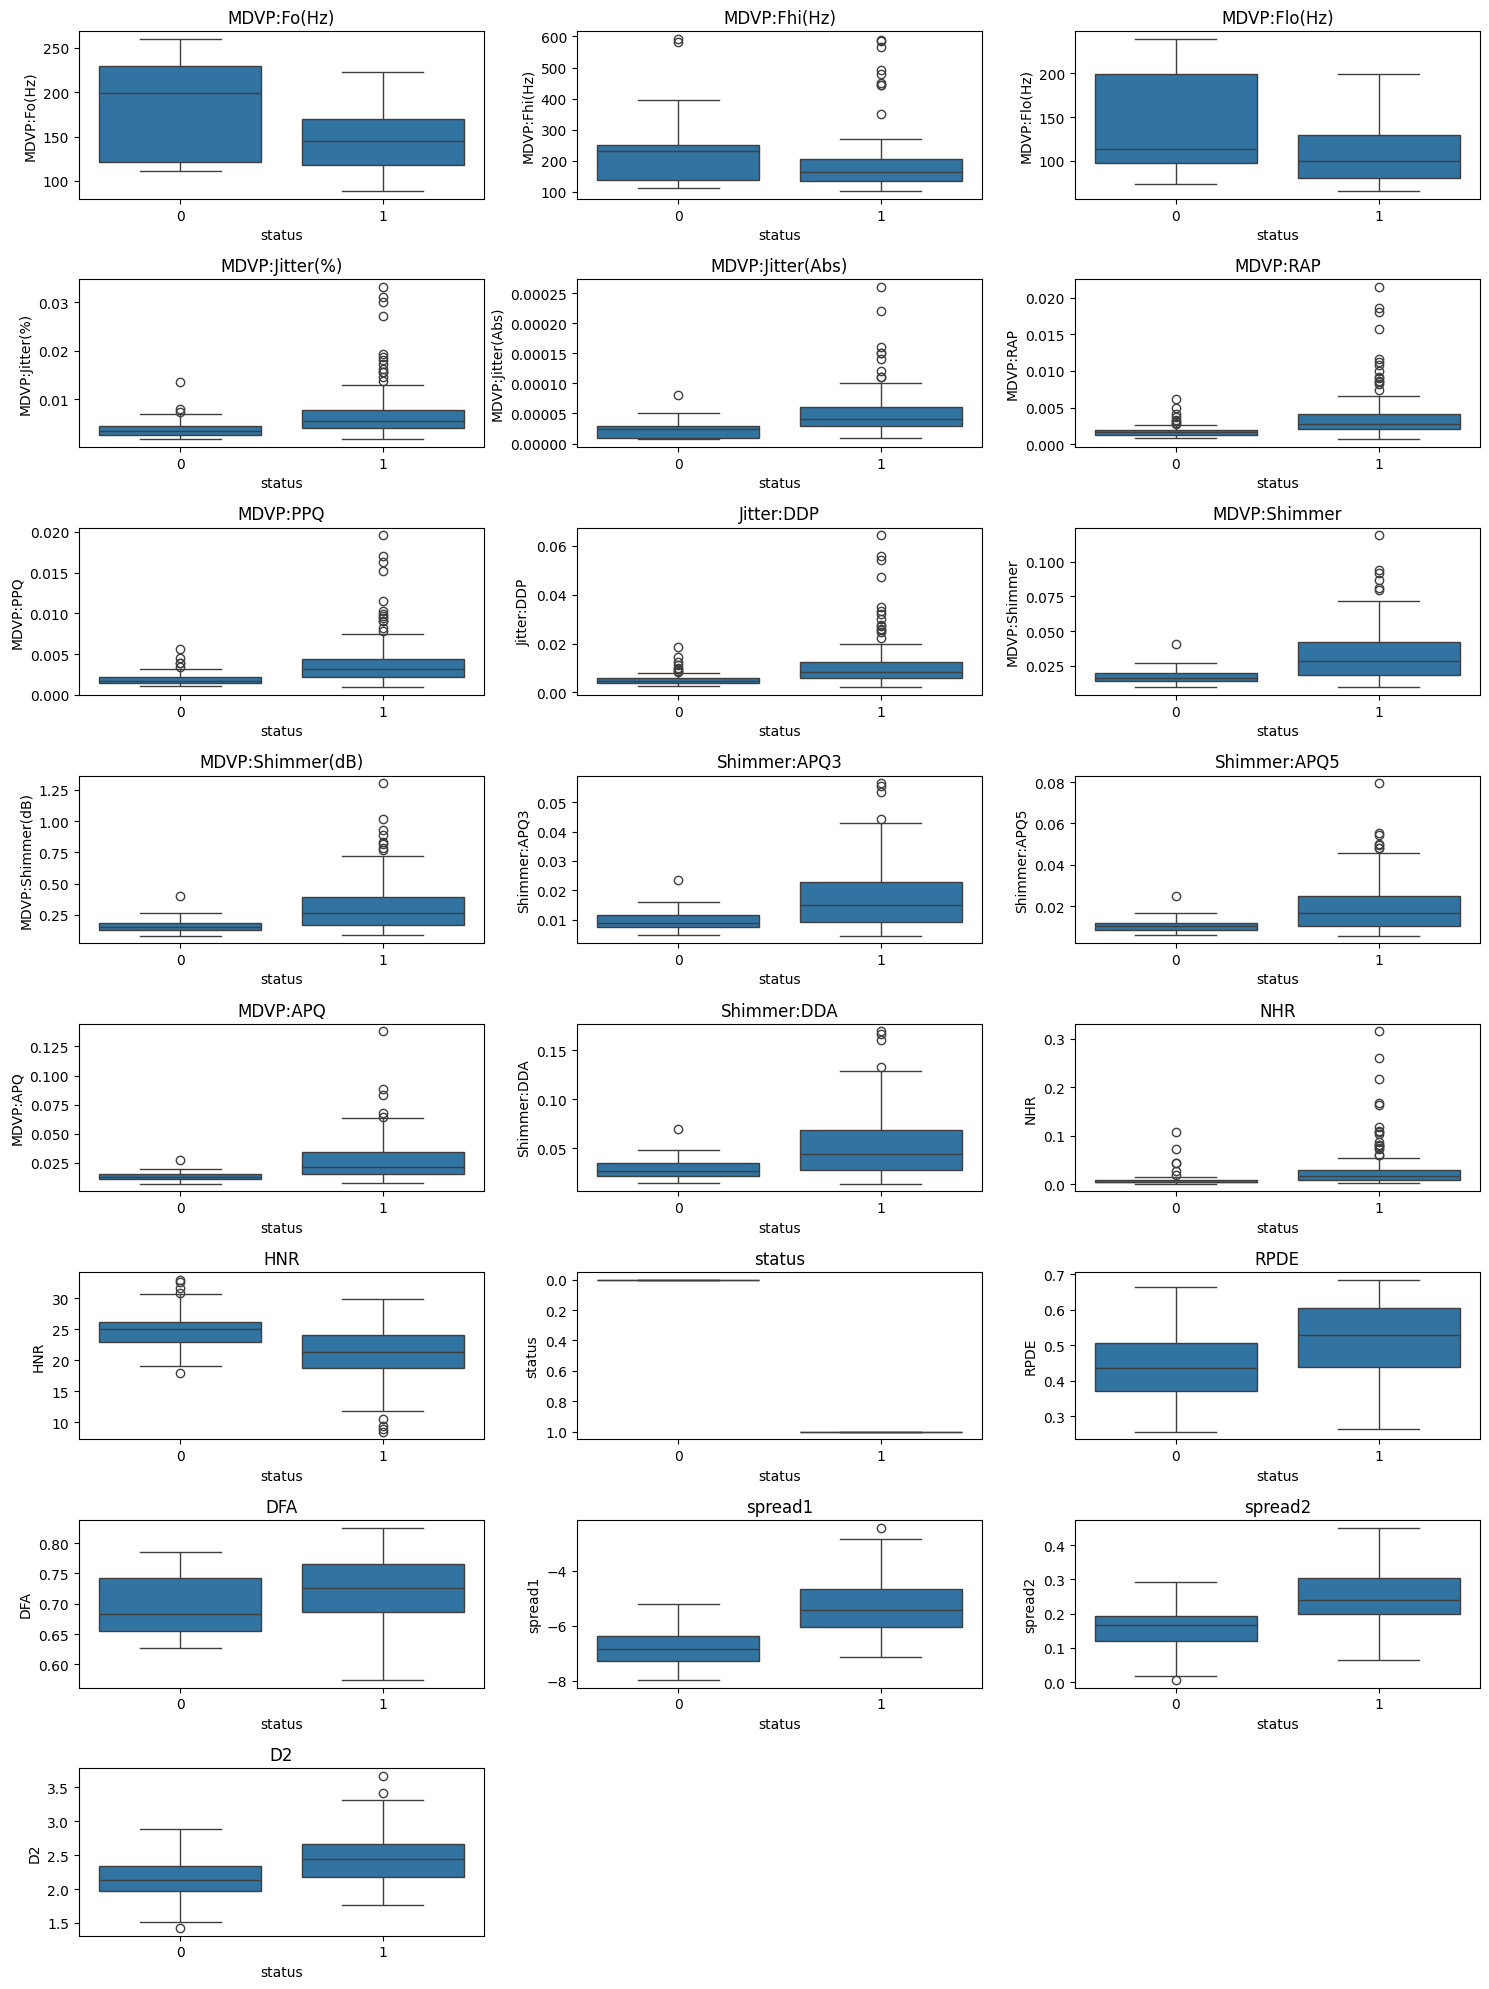

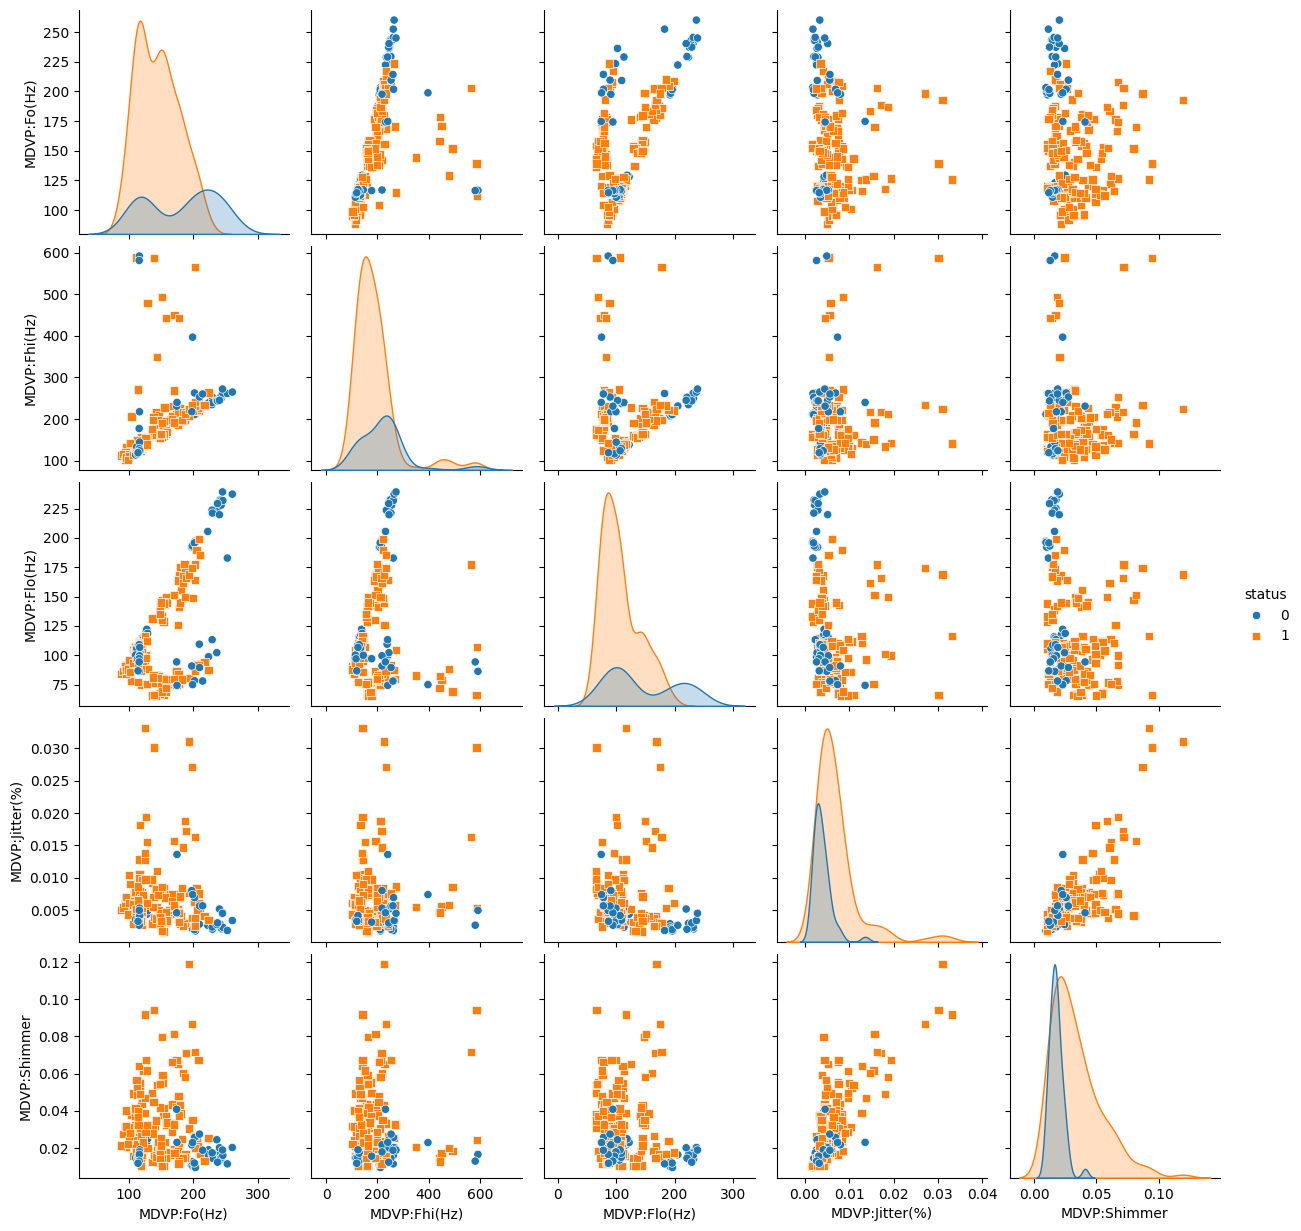

In [ ]:
#целевая переменная 'status' является категориальной
data['status'] = data['status'].astype('category')

# Построение boxplot для каждого признака в зависимости от целевой переменной
features = data.columns[1:-1]  # Все признаки, кроме 'name' и 'status'

plt.figure(figsize=(15, 20))
for i, feature in enumerate(features):
    plt.subplot(len(features) // 3 + 1, 3, i + 1)
    sns.boxplot(x='status', y=feature, data=data)
    plt.title(feature)

plt.tight_layout()
plt.show()

# Построение pairplot для визуализации взаимосвязей между признаками
# Выбераем несколько признаков для pairplot, чтобы избежать перегрузки графика
selected_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer', 'status']
sns.pairplot(data[selected_features], hue='status', markers=["o", "s"])
plt.show()

In [ ]:
with open('/content/parkinsons.names', 'r') as file:
    content = file.read()
    print(content)

Title: Parkinsons Disease Data Set

Abstract: Oxford Parkinson's Disease Detection Dataset

-----------------------------------------------------	

Data Set Characteristics: Multivariate
Number of Instances: 197
Area: Life
Attribute Characteristics: Real
Number of Attributes: 23
Date Donated: 2008-06-26
Associated Tasks: Classification
Missing Values? N/A

-----------------------------------------------------	

Source:

The dataset was created by Max Little of the University of Oxford, in 
collaboration with the National Centre for Voice and Speech, Denver, 
Colorado, who recorded the speech signals. The original study published the 
feature extraction methods for general voice disorders.

-----------------------------------------------------

Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
rec

In [ ]:
# Создание копии данных для аугментации
data_augmented = data.copy()

# Дублирование данных
data_augmented = pd.concat([data, data_augmented], ignore_index=True)

In [ ]:
# Определение числовых столбцов
numeric_columns = data.select_dtypes(include=[np.number]).columns  # Выбор только числовых столбцов

# Создание новой переменной для данных с шумом
data_augmented_with_noise = data_augmented.copy()

# Добавление гауссовского шума ко всем числовым столбцам в новой переменной
for col in numeric_columns:
    # Проверка на наличие пропущенных значений
    if data_augmented_with_noise[col].isnull().any():
        print(f"В столбце {col} есть пропущенные значения. Шум не будет добавлен.")
        continue

    # Генерация шума
    noise = np.random.normal(0, 0.1 * data[col].std(), size=data_augmented_with_noise[col].shape)  # Шум с учетом стандартного отклонения
    data_augmented_with_noise[col] += noise  # Добавляем шум ко всем данным в новой переменной

# Убеждаемся, что значения остаются в разумных пределах
data_augmented_with_noise[numeric_columns] = data_augmented_with_noise[numeric_columns].clip(lower=0)  #ограничение снизу

# Проверка результата
print(data_augmented_with_noise.head(10))  # Печать первых 10 строк для проверки
print(data_augmented_with_noise.shape)  # Печать новой формы датасета

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1   123.261107    156.690610     77.382391        0.008137   
1  phon_R01_S01_2   125.471367    157.394719    119.509286        0.010556   
2  phon_R01_S01_3   116.653622    133.852148    111.125587        0.010865   
3  phon_R01_S01_4   115.394726    134.037120    116.489973        0.009049   
4  phon_R01_S01_5   115.682714    124.671686    113.832310        0.012848   
5  phon_R01_S01_6   121.392713    143.193702    113.940655        0.009606   
6  phon_R01_S02_1   121.413447    124.626535    115.158404        0.003590   
7  phon_R01_S02_2   108.467210    117.954176    105.655315        0.003096   
8  phon_R01_S02_3    93.816397    124.099938     88.864073        0.005752   
9  phon_R01_S02_4   100.826499    129.729180     81.733500        0.005905   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0          0.000065  0.003187  0.005248    0.010274      0.045185  

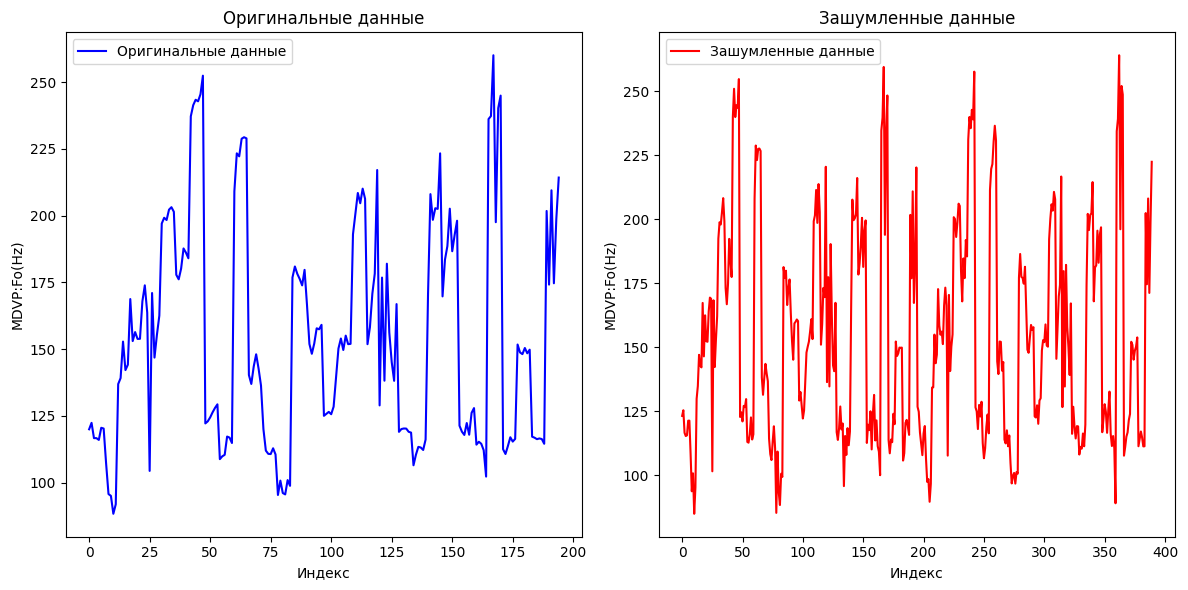

In [ ]:
# Визуализация зашумленных значений
plt.figure(figsize=(12, 6))

# Оригинальные данные
plt.subplot(1, 2, 1)
plt.plot(data['MDVP:Fo(Hz)'], label='Оригинальные данные', color='blue')
plt.title('Оригинальные данные')
plt.xlabel('Индекс')
plt.ylabel('MDVP:Fo(Hz)')
plt.legend()

# Зашумленные данные
plt.subplot(1, 2, 2)
plt.plot(data_augmented_with_noise['MDVP:Fo(Hz)'], label='Зашумленные данные', color='red')
plt.title('Зашумленные данные')
plt.xlabel('Индекс')
plt.ylabel('MDVP:Fo(Hz)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Обычная
# Фильтрафия столбцов
X = data_augmented_with_noise.drop(columns=['name', 'status'])  # Убираем 'name' и 'status' т.к не нужны в обучении
y = data_augmented_with_noise['status'] #переменная с здоров или нет используеться для обучения модели и оценки ее точности.


# смотрим на наши данные и вычисляем, какое у них среднее значение и насколько они разбросаны (стандартное отклонение).
scaler = StandardScaler() #приводим данные к общему масштабу, чтобы они имели среднее значение 0 и стандартное отклонение 1
X_scaled = scaler.fit_transform(X) #fit_transform вычисляет параметры (среднее и стандартное отклонение)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = xgb.XGBClassifier(eval_metric='logloss')#val_metric='logloss' указывает, что мы будем использовать логарифмическую потерю (log loss) в качестве метрики для оценки качества модели во время обучения.
model.fit(X_train, y_train)#обучаем модель на обучающей выборке

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test) #метод для получения предсказаний модели на тестовой выборке
              #передаем стандартизированные признаки X_test, и модель возвращает предсказанные метки (0 или 1) для каждого примера


# Оценка точности
accuracy = accuracy_score(y_test, y_pred)#функция из библиотеки sklearn вычисляет точность, сравнивая y_pred с истинными метками y_test
print(f'Точность: {accuracy * 100:.2f}%')

# параметры для поиска
param_grid = { #словарь, который определяет набор гиперпараметров, которые мы хотим оптимизировать
    'max_depth': [3, 4, 5, 6], # максимальная глубина дерева. Чем больше глубина, тем более сложные модели могут быть построены
    'n_estimators': [100, 200, 300],#Количество деревьев. Большее количество деревьев может улучшить производительность, но также увеличивает время обучения.
    'learning_rate': [0.01, 0.1, 0.2],#Скорость обучения, которая контролирует, насколько сильно каждое дерево влияет на итоговое предсказание. Меньшие значения могут привести к более стабильным, но медленным результатам.
}

# Поиск по сетке
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)#перебирает все возможные комбинации параметров, указанных в param_grid, и оценивает каждую комбинацию с помощью кросс-валидации.
#estimator=model - модель, которую мы хотим оптимизировать param_grid=param_grid: словарь с гиперпараметрами, которые мы хотим оптимизировать.scoring='accuracy': указываем точность как метрику для оценки производительности модели.
#cv=3: Это количество фолдов для кросс-валидации(данные будут разделены на 3 части)
grid_search.fit(X_train, y_train) #метод запускает процесс поиска по сетке, обучая модель на каждой комбинации гиперпараметров и оценивая ее производительность


# Лучшая модель
best_model = grid_search.best_estimator_

# Прогнозирование и оценка точности
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Наилучшая точность: {best_accuracy * 100:.2f}%')

Точность: 96.15%
Наилучшая точность: 96.15%


In [ ]:
#С кросс валидацией
# Фильтрация столбцов
X = data_augmented_with_noise.drop(columns=['name', 'status'])  # Убираем 'name' и 'status' т.к. не нужны в обучении
y = data_augmented_with_noise['status']  # Переменная с "здоров" или "нет", используется для обучения модели и оценки ее точности.

# Смотрим на наши данные и вычисляем, какое у них среднее значение и насколько они разбросаны (стандартное отклонение).
scaler = StandardScaler()  # Приводим данные к общему масштабу, чтобы они имели среднее значение 0 и стандартное отклонение 1
X_scaled = scaler.fit_transform(X)  # fit_transform вычисляет параметры (среднее и стандартное отклонение)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.24, random_state=42)

# Создание и обучение модели
model = xgb.XGBClassifier(eval_metric='logloss')  # val_metric='logloss' указывает, что мы будем использовать логарифмическую потерю (log loss) в качестве метрики для оценки качества модели во время обучения.
model.fit(X_train, y_train)  # Обучаем модель на обучающей выборке

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)  # Метод для получения предсказаний модели на тестовой выборке

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)  # Функция из библиотеки sklearn вычисляет точность, сравнивая y_pred с истинными метками y_test
print(f'Точность: {accuracy * 100:.2f}%')

# Кросс-валидация
cv_scores = cross_val_score(model, X_scaled, y, cv=10)  # 5-фолдовая кросс-валидация
print(f'Средняя точность кросс-валидации: {cv_scores.mean() * 100:.2f}%')

# Параметры для поиска
param_grid = {  # Словарь, который определяет набор гиперпараметров, которые мы хотим оптимизировать
    'max_depth': [3, 4, 5, 6],  # Максимальная глубина дерева. Чем больше глубина, тем более сложные модели могут быть построены
    'n_estimators': [100, 200, 300],  # Количество деревьев. Большее количество деревьев может улучшить производительность, но также увеличивает время обучения.
    'learning_rate': [0.01, 0.1, 0.2],  # Скорость обучения, которая контролирует, насколько сильно каждое дерево влияет на итоговое предсказание. Меньшие значения могут привести к более стабильным, но медленным результатам.
}

# Поиск по сетке
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)  # Перебирает все возможные комбинации параметров
grid_search.fit(X_train, y_train)  # Метод запускает процесс поиска по сетке

# Лучшая модель
best_model = grid_search.best_estimator_

# Прогнозирование и оценка точности
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Наилучшая точность: {best_accuracy * 100:.2f}%')

# Кросс-валидация для лучшей модели
best_cv_scores = cross_val_score(best_model, X_scaled, y, cv=10)  # 5-фолдовая кросс-валидация для лучшей модели
print(f'Средняя точность кросс-валидации для лучшей модели: {best_cv_scores.mean() * 100:.2f}%')

Точность: 95.74%
Средняя точность кросс-валидации: 95.13%
Наилучшая точность: 96.81%
Средняя точность кросс-валидации для лучшей модели: 93.59%


Задача 3. Творческая
Во многих крупных ИТ-компаниях существует практика, что сотрудник 80% времени тратит на проекты компании, а 20% на проекты, которые, как он считает могут принести прибыль компании в будущем. Умение вести такие "личные" проекты - очень высоко ценится.

Твоя  задача, поставить такую задачу перед собой и ее решить, используя следующие вводные:

Это должна быть задача классического машинного обучения.
Ты должен продемонстрировать умение визуализировать данные.
Твое решение должно быть полным, работоспособным, с развернутым описанием, так чтобы ее было не стыдно разместить в вашем резюме и GitHub.
Это должно быть твое решение. Твоя задача не должна быть заимствована с GitHub, Kaggle, Хабра и т.д.
Использовать можно любой публичный датасет.
Если ты знаете, где хочешь работать, то попробуй спрогнозировать, какая задача будет в будущем интересна для этой компании.
Если у тебя имеется своя личная задача, которую ты хочешь решить в рамках курса или с которой ты пришел на курс, можешь взять ее. Если твоя задача будет сложная, амбициозная, то можешь ее делать дольше предложенного срока в 2 недели, при поддержке кураторов.
Наши идеи для творческой задачи тебе в помощь:

Публичные датасеты для творческих задач по ИИ
ты можешь выбрать одну из семи увлекательных тем для вашего следующего проекта или исследования:

 Общие Датасеты

1. COCO (Common Objects in Context) - [COCO Dataset] (http://cocodataset.org/)

2. Open Images Dataset от Google - [Open Images Dataset](https://storage.googleapis.com/openimages/web/index.html)

3. Открытый доступ к коллекции Метрополитен-музея - [The Met Collection](https://www.metmuseum.org/art/collection)

4. IMDb Dataset - [IMDb Dataset] (https://www.imdb.com/interfaces/)

5. LibriSpeech - [LibriSpeech] (http://www.openslr.org/12/)

6. Стэнфордские сетевые наборы данных - [Stanford Network Analysis Project](https://snap.stanford.edu/data/index.html)

7. Наборы данных Kaggle - [Kaggle Datasets] (https://www.kaggle.com/datasets)

8. Quick, Draw! от Google - [Quick, Draw! Dataset] (https://github.com/googlecreativelab/quickdraw-dataset)

Специализированные темы с Kaggle

1. Компьютерное Зрение - [Kaggle Computer Vision Datasets] (https://www.kaggle.com/datasets?tags=13207-Computer+Vision)2. Образование - [Kaggle Education Datasets] (https://www.kaggle.com/datasets?tags=11105-Education)

3. Классификация - [Kaggle Classification Datasets] (https://www.kaggle.com/datasets?tags=13302-Classification)

4. Информационные Науки - [Kaggle Computer Science Datasets] (https://www.kaggle.com/datasets?tags=12107-Computer+Science)

5. NLP (Обработка Естественного Языка) - [Kaggle NLP Datasets] (https://www.kaggle.com/datasets?tags=13204-NLP)

6. Визуализация Данных - [Kaggle Data Visualization Datasets] (https://www.kaggle.com/datasets?tags=13208-Data+Visualization)

7. Предобученные Модели - [Kaggle Pre-Trained Model Datasets] (https://www.kaggle.com/datasets?tags=16668-Pre-Trained+Model)

В качестве идеи можешь рассмотреть такой вариант

Франшизы составляют значительную часть рынка B2B.

Понимая, что каждая седьмая компания в мире является франшизой, мы видим огромный потенциал для разработки специализированных решений.

Основная ценность франшизы заключается в передаче знаний и правил работы. Изучение этих правил и их эффективное применение является ключом к успеху франчайзи.

Владельцы франшиз сталкиваются с необходимостью постоянно отвечать на вопросы, связанные с правилами франшизы, что требует времени и ресурсов.

Исходя из этого, предлагается создать ИИ-помощника, который сможет автоматически отвечать на вопросы, связанные с правилами франшизы. Это может значительно упростить и ускорить процесс обучения и поддержки франчайзи, а также снизить затраты на коммуникации.

Для вдохновения можно изучить примеры существующих платформ, например:

Франшизы России: Topfranchise.ru предлагает каталог франшиз, доступных в России на 2023-2024 годы.   
Франшизы Казахстана: Hf.ru представляет каталог лучших и наиболее выгодных франшиз Казахстана на 2023 год.   
Франшизы Грузии: Topfranchise.ru также предоставляет каталог франшиз в Грузии на 2023 год.
Франшизы Белоруссии: Каталог франшиз в Беларуси представлен на сайте Belfranchising.by, где можно найти различные франшизы, доступные для покупки в Беларуси  
Не нашли тему, которая вас вдохновляет? Нет проблемы.Если у вас есть уникальная идея или конкретная тема, которую вы хотите исследовать, мы полностью поддерживаем ваше стремление к инновациям и творчеству. Предложите свою тему и воплотите её в жизнь.

In [2]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=d3c49482a25a1681cf73dea4c2a7428770ba262b1b37d8982acffb769ebc573d
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [9]:
# Подключение к API https://fredaccount.stlouisfed.org/apikey для получения индекса потреб. цен и процентных ставок
api_key = '9df5d3a8938d6fc0bc488386c453c2ed'

#получение данных по индексу потребительских цен (CPI) и процентных ставках
series_id_cpi = 'CPIAUCNS'  # ID серии для CPI
series_id_interest_rate = 'FEDFUNDS'  # ID серии для процентных ставок

# URL для запроса данных
url_cpi = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id_cpi}&api_key={api_key}&file_type=json' #URL для CPI
url_interest_rate = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id_interest_rate}&api_key={api_key}&file_type=json'#URL для процентных ставок

# Выполнение запросов
response_cpi = requests.get(url_cpi) #Запрос данных по CPI
response_interest_rate = requests.get(url_interest_rate) #Запрос данных по процентным ставкам

# Преобразование данных в JSON
data_cpi = response_cpi.json() #Данные CPI
data_interest_rate = response_interest_rate.json()#Данные процентных ставок

# Преобразование данных в DataFrame
observations_cpi = data_cpi['observations'] #Создание DataFrame для CPI
df_cpi = pd.DataFrame(observations_cpi)

observations_interest_rate = data_interest_rate['observations']#Создание DataFrame для процентных ставок
df_interest_rate = pd.DataFrame(observations_interest_rate)

# Преобразование даты в формат datetime
df_cpi['date'] = pd.to_datetime(df_cpi['date']) #Для CPI
df_cpi.set_index('date', inplace=True)

df_interest_rate['date'] = pd.to_datetime(df_interest_rate['date']) #Для процентных ставок
df_interest_rate.set_index('date', inplace=True)

# Объединение данных
macro_data = pd.merge(df_cpi, df_interest_rate, left_index=True, right_index=True, suffixes=('_cpi', '_interest_rate')) #Объединение данных по индексу даты

# Вывод первых 5 строк
print(macro_data.head())

# Объединение данных
df['date'] = pd.to_datetime(df['time'])  # Преобразование времени в формат datetime
df.set_index('date', inplace=True)
# Объединение с макроэкономическими данными
df = df.join(macro_data, how='left')
# Удаление строк с NaN значениями
df.dropna(inplace=True)

           realtime_start_cpi realtime_end_cpi value_cpi  \
date                                                       
1954-07-01         2024-12-12       2024-12-12      26.9   
1954-08-01         2024-12-12       2024-12-12      26.9   
1954-09-01         2024-12-12       2024-12-12      26.8   
1954-10-01         2024-12-12       2024-12-12      26.8   
1954-11-01         2024-12-12       2024-12-12      26.8   

           realtime_start_interest_rate realtime_end_interest_rate  \
date                                                                 
1954-07-01                   2024-12-12                 2024-12-12   
1954-08-01                   2024-12-12                 2024-12-12   
1954-09-01                   2024-12-12                 2024-12-12   
1954-10-01                   2024-12-12                 2024-12-12   
1954-11-01                   2024-12-12                 2024-12-12   

           value_interest_rate  
date                            
1954-07-01            

In [59]:
import requests
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import ta  # библиотека для технического анализа

# Запрос к API CryptoCompare
url = "https://min-api.cryptocompare.com/data/v2/histoday"
parameters = {
    'fsym': 'BTC',  # Символ криптовалюты
    'tsym': 'USD',  # Символ валюты
    'limit': 600,   # Количество возвращаемых данных
    'aggregate': 1
}

response = requests.get(url, params=parameters)
data = response.json()#формируем запрос к API для получения исторических данных о ценах Bitcoin (BTC) в долларах (USD) за последние 600 дней.

# Проверка успешности запроса
if data['Response'] == 'Success': #Проверяем, успешно ли выполнен запрос
    # Преобразование данных в DataFrame
    df = pd.DataFrame(data['Data']['Data'])#Преобразуем полученные данные в DataFrame для удобной работы с ними

    # Добавление технических индикаторов
    df['SMA_10'] = ta.trend.sma_indicator(df['close'], window=10)  # 10-дневная скользящая средняя
    df['SMA_50'] = ta.trend.sma_indicator(df['close'], window=50)  # 50-дневная скользящая средняя
    df['RSI'] = ta.momentum.rsi(df['close'], window=14)  # Индекс относительной силы
    df['MACD'] = ta.trend.macd(df['close'])  # MACD
    df['EMA_10'] = ta.trend.ema_indicator(df['close'], window=10)#10-дневная экспоненциальная скользящая средняя. Она придает больший вес более недавним ценам, чем более старым, что делает ее более чувствительной к изменениям цен.
    df['EMA_50'] = ta.trend.ema_indicator(df['close'], window=50)#50-дневная экспоненциальная скользящая средняя. Также более чувствительна к недавним изменениям, чем SMA.
    df['ATR'] = ta.volatility.average_true_range(df['high'], df['low'], df['close'], window=14)#Средний истинный диапазон, который измеряет волатильность рынка. Чем выше значение ATR, тем выше волатильность
    #полосs Боллинджера. Указывают на уровень перекупленности
    df['BB_upper'], df['BB_middle'], df['BB_lower'] = ta.volatility.bollinger_hband(df['close'], window=20, window_dev=2), ta.trend.sma_indicator(df['close'], window=20), ta.volatility.bollinger_lband(df['close'], window=20, window_dev=2)
    df.dropna(inplace=True)
    # Добавление объема торгов за предыдущие дни
    df['volumefrom_lag_1'] = df['volumefrom'].shift(1)  # Объем торгов за предыдущий день
    df['volumefrom_lag_3'] = df['volumefrom'].shift(3)  # Объем торгов за 3 дня назад
    df['volumefrom_lag_7'] = df['volumefrom'].shift(7)  # Объем торгов за 7 дней назад
    df['volumefrom_lag_14'] = df['volumefrom'].shift(14)  # Объем торгов за 14 дней назад
    # Удаление строк с NaN значениями
    df.dropna(inplace=True)

    # Выбор признаков и целевой переменной
    features_columns = ['open', 'high', 'low', 'volumefrom', 'volumeto',#создается список features_columns, который содержит названия столбцов, которые будут использоваться в качестве признаков (фич) для модели
                        'SMA_10', 'SMA_50', 'RSI', 'MACD', 'ATR',
                        'EMA_10', 'EMA_50', 'BB_upper', 'BB_middle', 'BB_lower',
                        'volumefrom_lag_1', 'volumefrom_lag_3', 'volumefrom_lag_7', 'volumefrom_lag_14',
                        'inflation_rate', 'interest_rate', 'value_interest_rate', 'value_cpi']  # так же убеждаемся что эти столбцы существуют

    # Фильтрация существующих столбцов
    existing_features = [col for col in features_columns if col in df.columns]#создает новый список existing_features, который содержит только те столбцы из features_columns, которые действительно существуют в DataFrame. Это важно, чтобы избежать ошибок

    # Выбор признаков
    features = df[existing_features]#DataFrame features, который содержит только те столбцы, которые были отфильтрованы на предыдущем шаге
    target = df['close']#target это целевая переменная которую мы будем предсказывать - close

    # Нормализация данных (процесс приведения значений признаков к одному масштабу, что может улучшить производительность)
    scaler = MinMaxScaler() #это метод нормализации, который преобразует данные так, чтобы они находились в диапазоне от 0 до 1
    features_scaled = scaler.fit_transform(features) #сначала вычисляет параметры (минимум и максимум) на обучающем наборе данных, а затем применяет преобразование к данным.

    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

    # Создание модели нейросети
    model = tf.keras.Sequential([ #простая нейронная сеть с двумя скрытыми слоями и одним выходным слоем. Используется функция активации leaky_relu и оптимизатор adam.
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='leaky_relu'),
        tf.keras.layers.Dense(32, activation='leaky_relu'),
        tf.keras.layers.Dense(1)
    ])

    # Компиляция модели
    model.compile(optimizer='adam', loss='mean_squared_error')#model.compile(...): Этот метод подготавливает модель к обучению. Он определяет, какой оптимизатор и функцию потерь использовать.
                                                  #Adam — алгоритм оптимизации, который адаптивно изменяет скорость обучения
                                                  #loss='mean_squared_error': Функция потерь, используемая для оценки качества модели
    # Обучение модели
    model.fit(X_train, y_train, epochs=100, batch_size=5, validation_split=0.2)#batch_size=5: Размер пакета данных, который будет использоваться для обновления весов модели

    # Оценка модели
    loss = model.evaluate(X_test, y_test)#loss: Значение функции потерь на тестовых данных
    print(f'значения потерь: {loss}')

    # Пример предсказания
    predictions = model.predict(X_test)#model.predict(): метод используется для получения предсказаний модели на новых данных
    print(predictions)
else:
    print("Ошибка при получении данных:", data['Message'])

Epoch 1/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3347486208.0000 - val_loss: 3200438272.0000
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3341527552.0000 - val_loss: 3191016960.0000
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3128625408.0000 - val_loss: 3162290432.0000
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3212587776.0000 - val_loss: 3103373056.0000
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3059625984.0000 - val_loss: 3008157952.0000
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3049574144.0000 - val_loss: 2868645120.0000
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2814499840.0000 - val_loss: 2683895552.0000
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2617861632.0000 - val_loss: 2451832320.0000
Epoch 9/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2351719168.0000 - val_loss: 2180627456.0000
Epoch 10/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2108148864.00

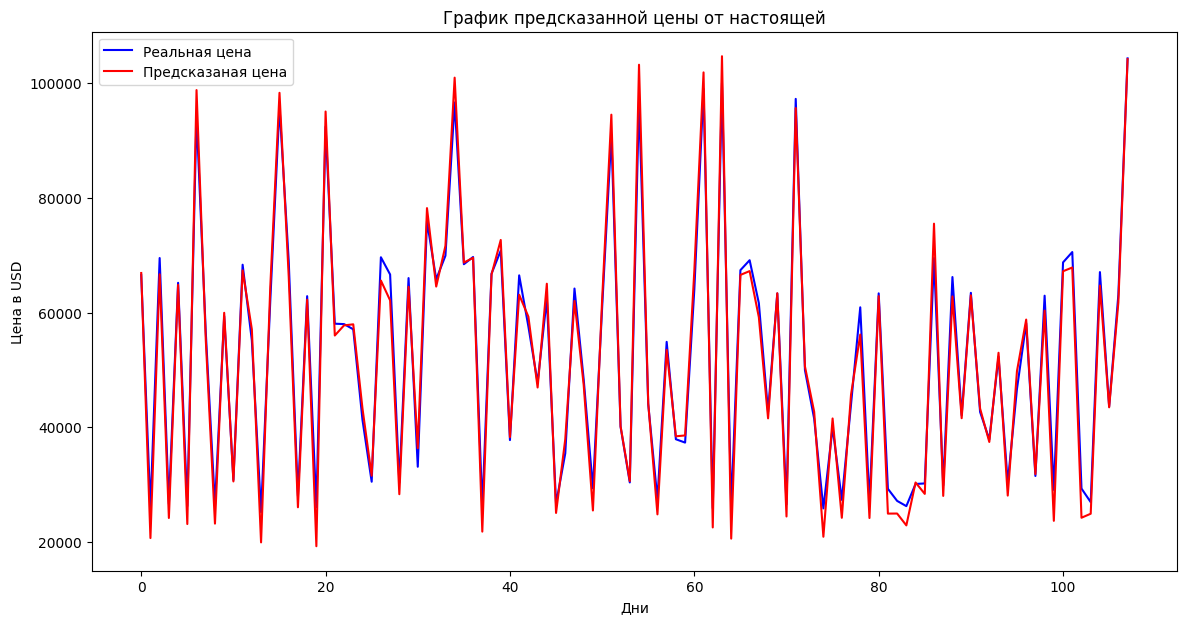

In [60]:
import matplotlib.pyplot as plt

#real_prices - это массив с реальными значениями
real_prices = y_test.values  # y_test - это реальные значения

# Преобразование предсказаний в одномерный массив
predicted_prices = predictions.flatten()

# Визуализация
plt.figure(figsize=(14, 7))
plt.plot(real_prices, label='Реальная цена', color='blue')
plt.plot(predicted_prices, label='Предсказаная цена', color='red')
plt.title('График предсказанной цены от настоящей')
plt.xlabel('Дни')
plt.ylabel('Цена в USD')
plt.legend()
plt.show()

[ -315.9878125   5255.83773437  2834.4528125   2439.613125
   362.90265625  3139.0446875  -4432.1190625   1325.83375
  3136.62335938  -579.8296875    252.90367187   991.749375
 -1937.38203125  5270.77898437 -2419.13734375 -2407.53625
  2730.0415625   1960.33257812   612.73484375  6826.07445312
 -2652.5278125   2062.01640625   222.723125    -865.24375
 -1980.30046875 -1044.65875     4058.029375    4515.6525
  2001.41078125  1518.60265625 -3230.64265625 -2293.0665625
  1269.640625   -1718.3346875  -4322.9325      -287.9246875
   143.9715625   4141.5909375    161.0221875  -1867.0471875
  -519.621875    3388.52296875 -1714.6815625    854.02234375
 -2590.66796875  1580.87476563 -2470.38046875  2161.37546875
   969.035       3862.09734375 -1389.77625    -3459.8221875
   -61.52453125  -224.14398438 -6181.5940625   -148.96
  2619.76132813  1401.970625    -511.81       -1250.0621875
 -3235.5775     -2886.1490625   3345.9103125  -4678.0590625
  5207.32328125   832.8903125   1896.7553125   2450.7

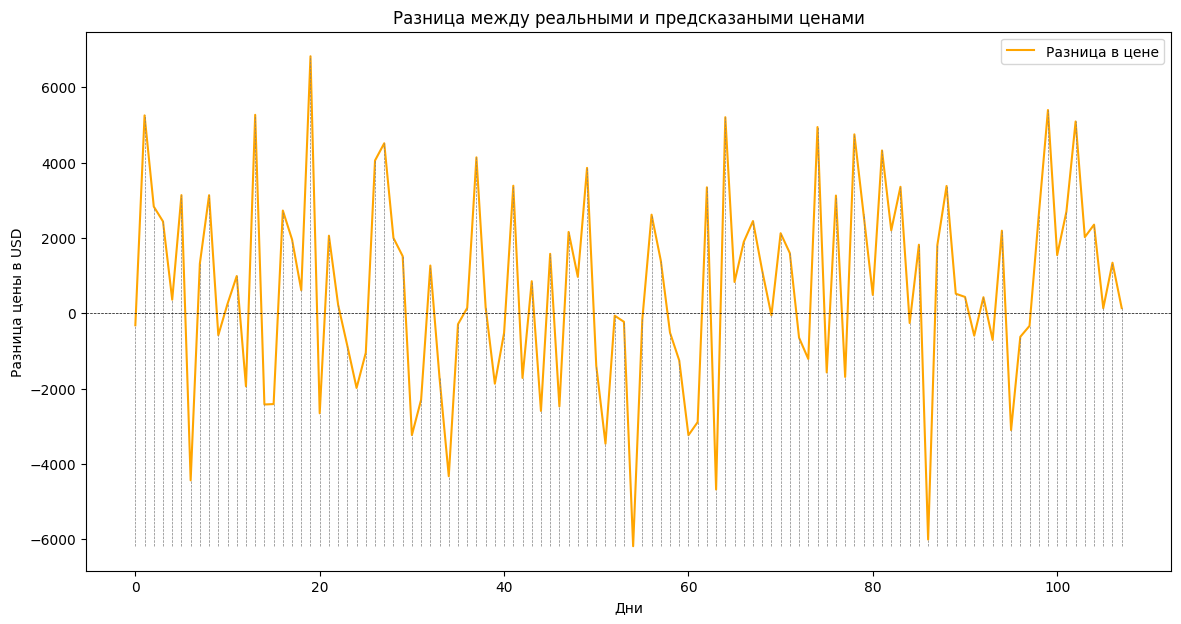

In [61]:
# массив реальных цен закрытия для тестовой выборки
real_prices = y_test.values  # y_test - это реальные значения

# Преобразование предсказаний в одномерный массив
predicted_prices = predictions.flatten()

# Вычисление разницы между реальными и предсказанными ценами
price_difference = real_prices - predicted_prices
print(price_difference)
# Визуализация разницы
plt.figure(figsize=(14, 7))
plt.plot(price_difference, label='Разница в цене', color='orange')
plt.title('Разница между реальными и предсказаными ценами')
plt.xlabel('Дни')
plt.ylabel('Разница цены в USD')

# Добавление штрихпунктирных линий
for i in range(len(price_difference)):
    plt.vlines(x=i, ymin=min(price_difference), ymax=price_difference[i], color='gray', linestyle='--', linewidth=0.5)

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Линия на уровне 0 для удобства
plt.legend()
plt.show()